In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.font_manager as fm
import warnings

warnings.simplefilter("ignore")



In [ ]:
import sys
if 'google.colab' in sys.modules:
  !echo 'debconf/frontend select Noninteractive' | debconf-set-selections
  !sudo apt-get -qq -y install fonts-nanum
  import matplotlib.font_manager as fm
  font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
  for fpath in font_files:
    fm.fontManager.addfont(fpath)

## 2-1 rcParams 클래스의 font.family 속성 변경하기
plt.rcParams['font.family'] = 'NanumGothic'

## 2-2 rc() 함수 사용하기
# rc('그룹', 속성 매개변수): 해당 그룹의 하위 속성을 매개변수로 지정한다
plt.rc('font', family='NanumBarunGothic')

print(plt.rcParams['font.family'])

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126209 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
['NanumBarunGothic']


In [ ]:
uni_df = pd.read_excel("/content/자치구별+대학교+학령인구(추계인구)_20250319223540.xlsx")
uni_df_2024 = uni_df[['자치구별(2)', '2024']].iloc[3:, :]
uni_df_2024 = uni_df_2024.set_index('자치구별(2)')
uni_df_2024.head()

,2024
자치구별(2),
종로구,7621
중구,4526
용산구,6729
성동구,10693
광진구,13865


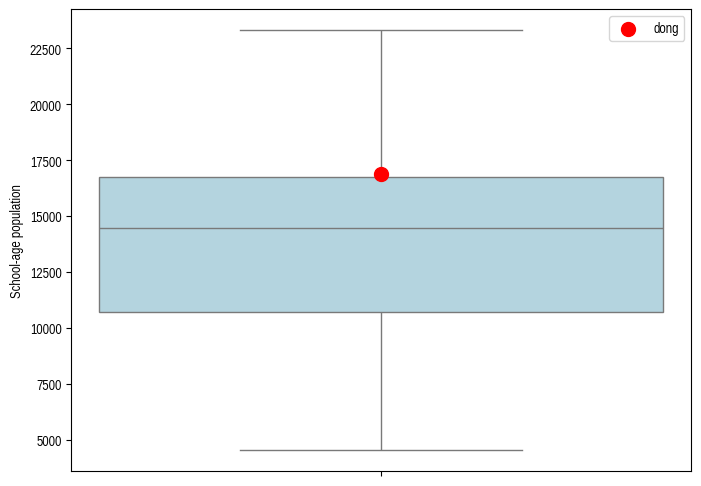

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=uni_df_2024['2024'], color="lightblue")  # 다른 자치구의 분포
plt.scatter(y=uni_df_2024.loc['동대문구', '2024'], x=[0], color="red", label="dong", s=100, zorder=3)  # 동대문구 값 강조

plt.ylabel("School-age population")
plt.legend()
plt.show()

In [ ]:
import folium
import pandas as pd

# 예시: 서울 자치구별 중심 좌표 (대략적인 값)
district_coords = {
    "종로구": (37.5729503, 126.9793579),
    "중구": (37.5637569, 126.9979452),
    "용산구": (37.5326003, 126.9907189),
    "성동구": (37.5504743, 127.0404663),
    "광진구": (37.5383567, 127.0825663),
    "동대문구": (37.5741432, 127.0391588),
    "중랑구": (37.606202, 127.092245),
    "성북구": (37.606256, 127.016913),
    "강북구": (37.639639, 127.025607),
    "도봉구": (37.665769, 127.031491),
    "노원구": (37.654722, 127.056111),
    "은평구": (37.617612, 126.929199),
    "서대문구": (37.579621, 126.937568),
    "마포구": (37.563757, 126.908306),
    "양천구": (37.512317, 126.866688),
    "강서구": (37.550135, 126.849532),
    "구로구": (37.495110, 126.887824),
    "금천구": (37.456802, 126.891351),
    "영등포구": (37.526034, 126.896471),
    "동작구": (37.512776, 126.939139),
    "관악구": (37.478035, 126.951463),
    "서초구": (37.483961, 127.032746),
    "강남구": (37.517236, 127.047324),
    "송파구": (37.51457, 127.105399),
    "강동구": (37.530065, 127.123719)
}

# 서울 중심 좌표 (예: 서울 시청)
seoul_center = [37.5665, 126.9780]
m = folium.Map(location=seoul_center, zoom_start=11)

# 최대 학령인구 값 (마커 크기 비율 계산용)
max_value = uni_df_2024['2024'].max()

for district, row in uni_df_2024.iterrows():
    if district in district_coords:
        lat, lon = district_coords[district]
        value = row['2024']
        # 마커의 반지름을 최대 50으로 조정 (비율 조정은 필요에 따라 변경)
        radius = (value / max_value) * 50

        # 동대문구는 색상을 빨간색으로 강조, 나머지는 파란색
        marker_color = 'red' if district == '동대문구' else 'blue'

        folium.CircleMarker(
            location=[lat, lon],
            radius=radius,
            popup=f"{district}: {value}",
            color=marker_color,
            fill=True,
            fill_color=marker_color,
            fill_opacity=0.6
        ).add_to(m)
    else:
        print(f"좌표 정보가 없는 자치구: {district}")

# 생성된 지도 보여주기 (Jupyter/Colab 환경에서는 m을 마지막에 실행하면 인터랙티브 맵이 표시됩니다)
m.save("seoul_bubble_map.html")
m